## Modelling for BME - Measurements simulation
### Practice 2
### Student: Eduardo Osquel Perez Rivero

In [ ]:
!pip install pmcx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 19.5 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix
from scipy.sparse import linalg
from scipy.sparse import diags
import pmcx  # Uncomment to use pmcs for MonteCarlo simulation

In [ ]:
# Check if GPU is available
# GPU can accelerate and reduce running time
pmcx.gpuinfo()
gpus = pmcx.gpuinfo()
gpus[0]

{'name': 'Tesla T4',
 'id': 1,
 'devcount': 1,
 'major': 7,
 'minor': 5,
 'globalmem': 15835660288,
 'constmem': 65536,
 'sharedmem': 49152,
 'regcount': 65536,
 'clock': 1590000,
 'sm': 40,
 'core': 2560,
 'autoblock': 64,
 'autothread': 81920,
 'maxgate': 0}

## Exercise 1

In this exercise, we aim to simulate a scenario involving a sphere with an absorbing inclusion to replicate real-world conditions. Specifically, we select deoxygenated blood as the material for the main cuboid object, representing tissue, and water as the absorbing inclusion within the sphere. Deoxygenated blood, a crucial component of biological tissues, contains hemoglobin with reduced oxygen levels, contributing to its characteristic dark red color. By incorporating this material into our simulation, we can accurately model light interaction and propagation within tissue-like structures. Additionally, water serves as a suitable choice for the absorbing inclusion due to its distinct optical properties and prevalence in biological environments. Through this setup, we can explore light-tissue interactions and gain valuable insights into the behavior of photon propagation in biological media

In [ ]:
# Using MonteCarlo to simulate
# Define parameters for simulation

# Define the size of the voxelized object
object_size = [60, 60, 60]

# Create an empty 3D numpy array to represent the object
object_vol = np.zeros(object_size, dtype='uint8') + 1

# Define the absorbing inclusion size: water
center = [30, 30, 30]
radius = 10
# radius = [10, 10, 20]

# Define the voxel coordinates for the sphere using meshgrid
x_coords, y_coords, z_coords = np.ogrid[:object_size[0], :object_size[1], :object_size[2]]
sphere_mask = (x_coords - center[0])**2 + (y_coords - center[1])**2 + (z_coords - center[2])**2 <= radius**2

# Update the object_vol array to include the sphere (assign label 2 to the sphere)
object_vol[sphere_mask] = 2

cfg = {
    'nphoton': 1e8,
    'vol': object_vol,
    'tstart': 0,
    'tend': 1,
    'tstep': 0.01,
    'issrcfrom0': 1,
    'srcpos': [30, 30, 1],
    'srctype': 'isotropic',  # Added the 'srctype' parameter
    'srcdir': [0, 0, 1],
    'prop': [
        [0, 0, 1, 1],
        [0.1, 100, 0.9, 1.37],
        [0.4, 100, 0.9, 1.37]
    ],
    'wavelength': 800,
    'bc': 'aaaaaa',
    'unitinmm': 0.2,
    'isreflect': 0
}

# Run the simulation
res = pmcx.run(cfg)

# Save the results of the simulation with the ab
fluence_MC = res['flux']
flu_1 = fluence_MC


nphoton: 1e+08
tstart: 0
tstep: 0.01
tend: 1
isreflect: 0
issrcfrom0: 1
unitinmm: 0.2


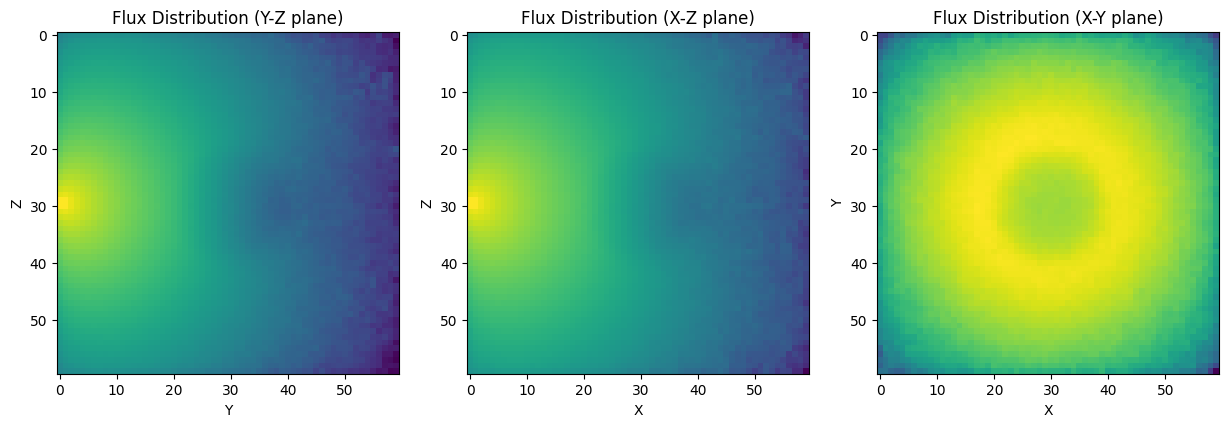

In [ ]:
# Plot the fluence distributions in different planes
plt.figure(figsize=(15, 9))

# Y-Z plane
plt.subplot(1, 3, 1)
plt.imshow(np.log10(flu_1[30, :, :, 0]))
plt.title("Flux Distribution (Y-Z plane)")
plt.xlabel("Y")
plt.ylabel("Z")

# X-Z plane
plt.subplot(1, 3, 2)
plt.imshow(np.log10(flu_1[:, 30, :, 0]))
plt.title("Flux Distribution (X-Z plane)")
plt.xlabel("X")
plt.ylabel("Z")

# X-Y plane
plt.subplot(1, 3, 3)
plt.imshow(np.log10(flu_1[:, :, 30, 0]))
plt.title("Flux Distribution (X-Y plane)")
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

The visualization reveals that the emitted light from the point light source on the left side undergoes absorption upon encountering the absorbing inclusion located at the center of the cuboid object

## Exercise 2

Now we define the configuration parameters for the second simulation using Monte Carlo. It specifies parameters such as the number of photons, volume properties, optical properties, simulation time, source position, source type, boundary conditions, and spatial unit. After running the simulation, it extracts the fluence data and stores it in the variable flu_2

In [ ]:
# Define configuration for the second simulation
cfg = {
    'nphoton': 1e8,
    'vol': np.ones([60, 60, 60], dtype='uint8'),
    'prop': [[0, 0, 1, 1], [0.1, 100, 0.9, 1.37]],
    'wavelength': 800,
    'tstart': 0,
    'tend': 1,
    'tstep': 0.01,
    'issrcfrom0': 1,
    'srcpos': [30, 30, 1],
    'srctype': 'isotropic',
    'isreflect': 0,
    'bc': 'aaaaaa',
    'unitinmm': 0.2,
    'srcdir': [0, 0, 1]
}

# Run the second simulation
res = pmcx.run(cfg)
fluence_MC = res['flux']
flu_2 = fluence_MC

nphoton: 1e+08
tstart: 0
tstep: 0.01
tend: 1
isreflect: 0
issrcfrom0: 1
unitinmm: 0.2


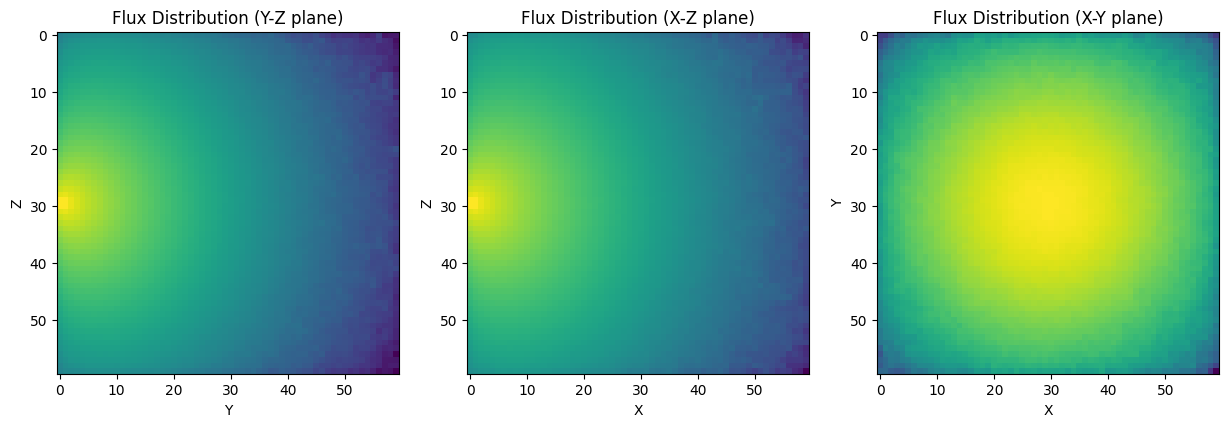

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(15, 9))

# Y-Z plane
plt.subplot(1, 3, 1)
plt.imshow(np.log10(flu_2[30, :, :, 0]))
plt.title("Flux Distribution (Y-Z plane)")
plt.xlabel("Y")
plt.ylabel("Z")

# X-Z plane
plt.subplot(1, 3, 2)
plt.imshow(np.log10(flu_2[:, 30, :, 0]))
plt.title("Flux Distribution (X-Z plane)")
plt.xlabel("X")
plt.ylabel("Z")

# X-Y plane
plt.subplot(1, 3, 3)
plt.imshow(np.log10(flu_2[:, :, 30, 0]))
plt.title("Flux Distribution (X-Y plane)")
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

Without an absorbing inclusion, we observe that as the distance from the light source increases, the intensity of the emitted light gradually diminishes. The third image exhibits a clear phenomenon: the radiative propagation of light accompanied by a uniform reduction in intensity

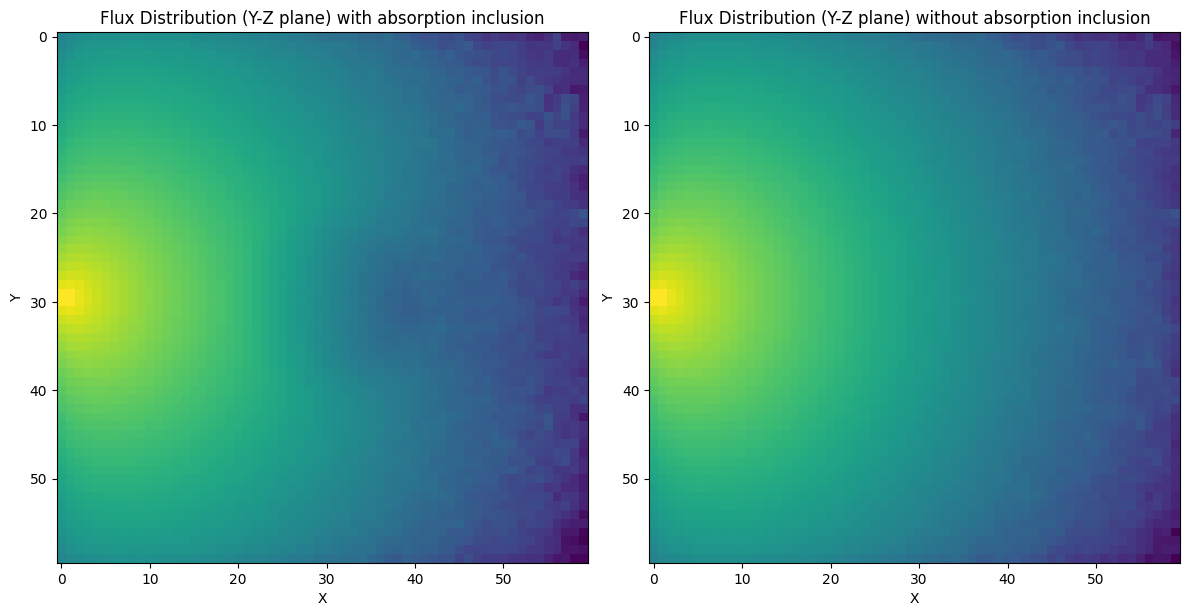

In [ ]:
plt.figure(figsize=(12, 6))

# Plot flux distribution for the case with absorption inclusion (flu_1)
plt.subplot(1, 2, 1)
plt.imshow(np.log10(flu_1[30, :, :, 0]))
plt.title("Flux Distribution (Y-Z plane) with absorption inclusion")
plt.xlabel("X")
plt.ylabel("Y")

# Plot flux distribution for the case without absorption inclusion (flu_2)
plt.subplot(1, 2, 2)
plt.imshow(np.log10(flu_2[30, :, :, 0]))
plt.title("Flux Distribution (Y-Z plane) without absorption inclusion")
plt.xlabel("X")
plt.ylabel("Y")

plt.tight_layout()
plt.show()

In the presence of an absorbing inclusion, light is absorbed as it propagates, leading to a uniform decrease in intensity before reaching the inclusion. Upon reaching the absorbing inclusion, a shadow forms due to its absorption properties. As a result of this absorption, the light dissipates after passing through the inclusion, resulting in a darker appearance. Conversely, in the absence of an absorbing inclusion, the intensity of light uniformly diminishes from the emission source, consistent with theoretical expectations

## Exercise 3

In this section, our objective is to compute the K matrix. Referring to the specifications of exercise 3, we require Gsm and Gmd. With these components in hand, we proceed to calculate the K matrix using the formula: K = G_sm * G_md

Then we run Monte Carlo simulation to get G_sm.

In [ ]:
# Define configuration for the simulation with detector
cfg = {
    'nphoton': 1e8,
    'vol': np.ones([60, 60, 60], dtype='uint8'),
    'prop': [[0, 0, 1, 1], [0.1, 100, 0.9, 1.37]],
    'wavelength': 800,
    'tstart': 0,
    'tend': 1,
    'tstep': 1,
    'bc': 'aaaaaa',
    'unitinmm': 0.2,
    'srctype': 'isotropic',
    'isreflect': 0,
    'issrcfrom0': 1,
    'issavedet': 1
}

# Source location
cfg['srcpos'] = [30, 30, 1]  # Source position at (30, 30, 1)

# Source direction
cfg['srcdir'] = [0, 0, 1]  # Source direction along the z-axis

# Detector positions
det = [[30, 30, i, 1] for i in range(60)]  # Detector positions at (30, 30, i) for i in range(60)
cfg['detpos'] = det

# Run the simulation
res = pmcx.mcxlab(cfg)

# Get the flux results
G_sm = res['flux']

# Source position
cfg['srcpos'] = [30, 30, 50]  # Source position at (30, 30, 50)

# Detector position
cfg['detpos'] = [30, 30, 1, 1]  # Detector position at (30, 30, 1)

# Run the simulation
res = pmcx.run(cfg)
G_md = res['flux']

nphoton: 1e+08
tstart: 0
tstep: 1
tend: 1
isreflect: 0
issrcfrom0: 1
unitinmm: 0.2
issavedet: 1
nphoton: 1e+08
tstart: 0
tstep: 1
tend: 1
isreflect: 0
issrcfrom0: 1
unitinmm: 0.2
issavedet: 1



Below, we derive the K matrix using Gsm and Gmd. Suppose we have N sources and a grid of detectors M. In this scenario, each row of the K matrix (size NxM) represents the flux of a single source detected across all MM detectors. For instance, the i row signifies the flux of the i source across all detectors if there are MM detectors in total. Conversely, there is only one column in total, corresponding to a single detector. Each column indicates the flux detected by that particular detector from different sources. (This explanation is simplified due to computational constraints.)

In [ ]:
# Calculate the product of the flux matrices G_sm and G_md
K = G_sm * G_md

# Check the shape of the resulting matrix
K.shape

(60, 60, 60, 1)

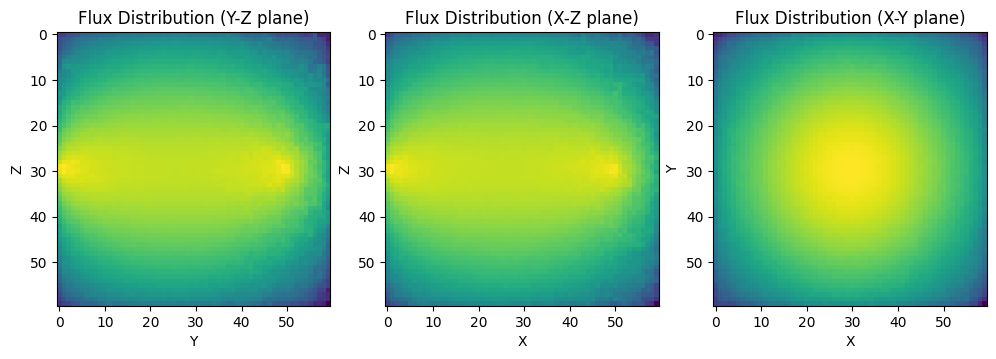

In [ ]:
plt.figure(figsize=(12, 6))

# Flux distribution in the Y-Z plane
plt.subplot(1, 3, 1)
plt.imshow(np.log10(K[30, :, :, 0]))
plt.title("Flux Distribution (Y-Z plane)")
plt.xlabel("Y")
plt.ylabel("Z")

# Flux distribution in the X-Z plane
plt.subplot(1, 3, 2)
plt.imshow(np.log10(K[:, 30, :, 0]))
plt.title("Flux Distribution (X-Z plane)")
plt.xlabel("X")
plt.ylabel("Z")

# Flux distribution in the X-Y plane
plt.subplot(1, 3, 3)
plt.imshow(np.log10(K[:, :, 30, 0]))
plt.title("Flux Distribution (X-Y plane)")
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

After reviewing the outcomes, it's evident that across different isotropic mediums, light emanates from the source and propagates towards the detector, gradually diminishing in intensity. This propagation forms an elliptical pattern, with the strongest light intensity occurring along the line directly from the source to the detector, which represents the ellipsoidal axis

## Exercise 5

Given that y represents the measurement data, it's obtained using Monte Carlo simulation. In the second scenario, flu_2 signifies the measurement data in the absence of an absorbing inclusion. Each pixel value within y corresponds to the light intensity emitted from the light source at that specific location. The A matrix serves as the K matrix, calculated as the product of G_sm and G_md

In [ ]:
K.shape

(60, 60, 60, 1)

K is a four-dimensional matrix, with the first three dimensions representing the sizes of x, y, and z, and the fourth digit depending on the number of steps in the Monte Carlo simulation.<br />
start = 0 , end = 1, step = 0.01, so I get 100 results of simulation.<br />
In order to get x, we know $$y = A * x$$
$$x = A^{-1} * y = K^{-1} * flu_2$$
We use the first result of 100 result to get x in below:


In [ ]:
y = flu_2[:,:,:,0]

# Solve the linear equation
x = np.linalg.inv(K[:,:,:,0]) * y

# Check the shape of the resulting matrix x
x.shape

(60, 60, 60)